In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
trainData =  pd.read_csv('https://raw.githubusercontent.com/team000012/kaggle-challenge/main/train.csv')
testData = pd.read_csv('https://raw.githubusercontent.com/team000012/kaggle-challenge/main/test.csv')
trainData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


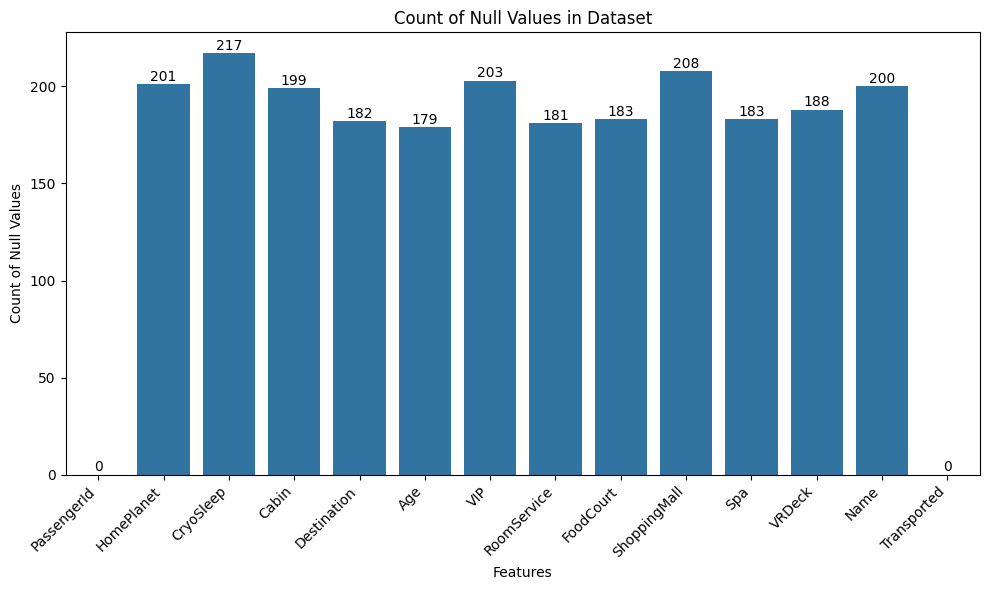

In [ ]:
# Count null values in each column
null_counts = trainData.isnull().sum()
plt.figure(figsize=(10, 6))
for i, value in enumerate(null_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Count of Null Values in Dataset')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

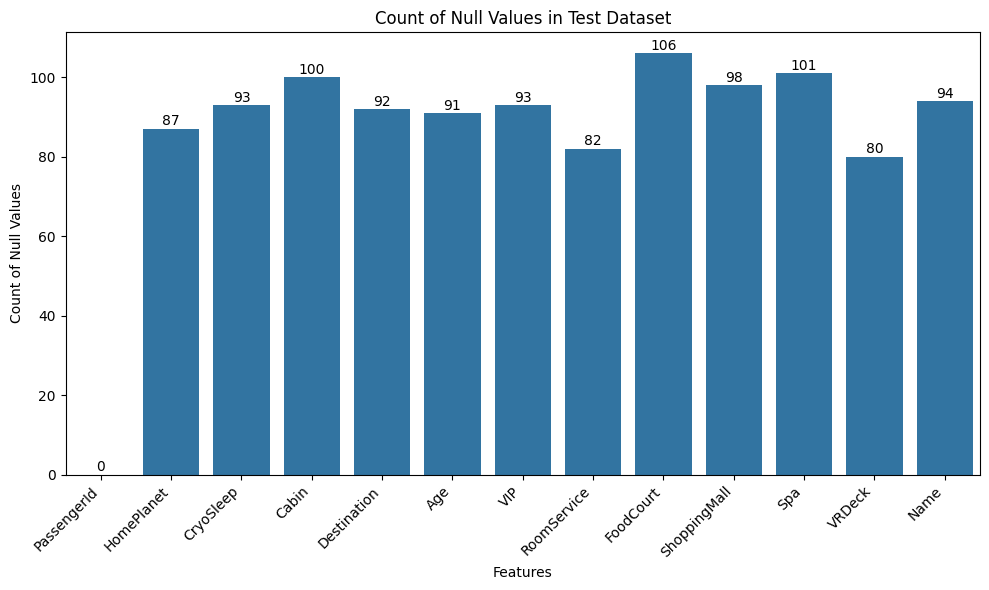

In [ ]:
# Count null values in each column
null_counts = testData.isnull().sum()
plt.figure(figsize=(10, 6))
for i, value in enumerate(null_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Count of Null Values in Test Dataset')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-23-2edf05ae6381>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')


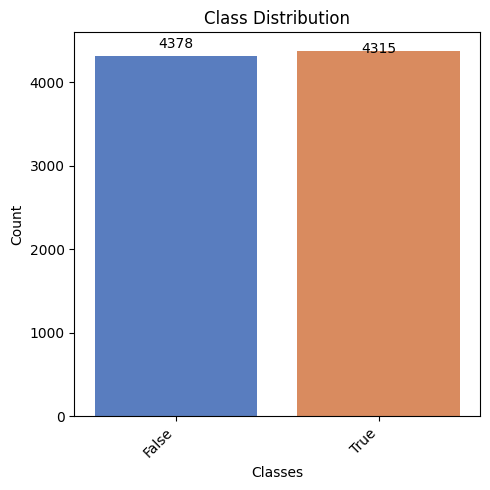

In [ ]:
#checking for imbalance in dataset
class_counts = trainData['Transported'].value_counts()
plt.figure(figsize=(5, 5))
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
numerical_cols = trainData.select_dtypes(include=['number']).columns

# Apply KNN Imputer to numerical columns only
imputer = KNNImputer(n_neighbors=2)
train_imputed_values = imputer.fit_transform(trainData[numerical_cols])
test_imputed_values = imputer.transform(testData[numerical_cols])

# Convert back to DataFrame
train_imputed_df = pd.DataFrame(train_imputed_values, columns=numerical_cols)
test_imputed_df = pd.DataFrame(test_imputed_values, columns=numerical_cols)

# Combine with non-numerical columns
train_imputed_df = pd.concat([train_imputed_df, trainData[trainData.columns.difference(numerical_cols)]], axis=1)
test_imputed_df = pd.concat([test_imputed_df, testData[testData.columns.difference(numerical_cols)]], axis=1)
train_imputed_df.isnull().sum()

Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Cabin           199
CryoSleep       217
Destination     182
HomePlanet      201
Name            200
PassengerId       0
Transported       0
VIP             203
dtype: int64

In [ ]:
train_imputed_df.drop(['Name','PassengerId','Cabin'],inplace = True,axis=1)

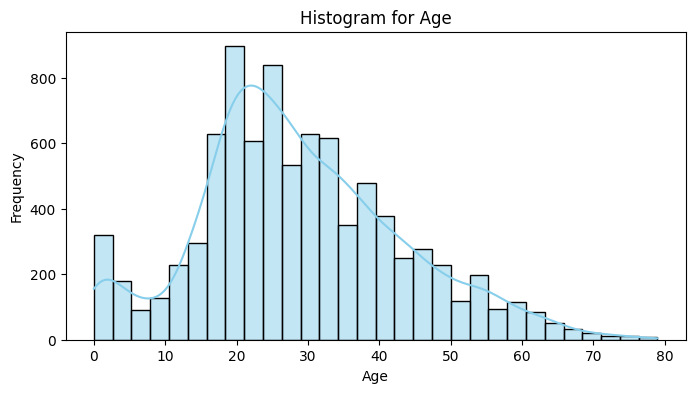

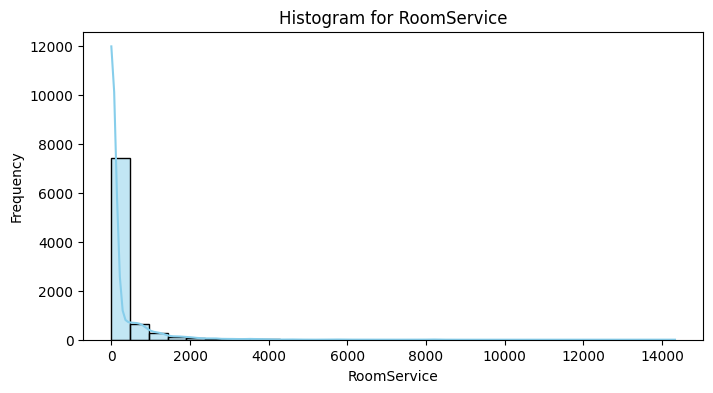

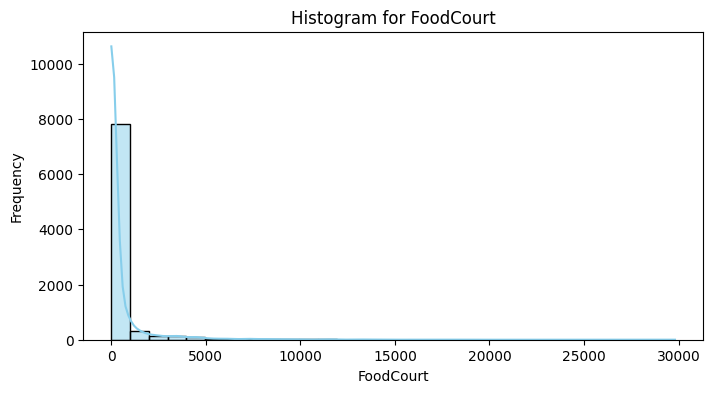

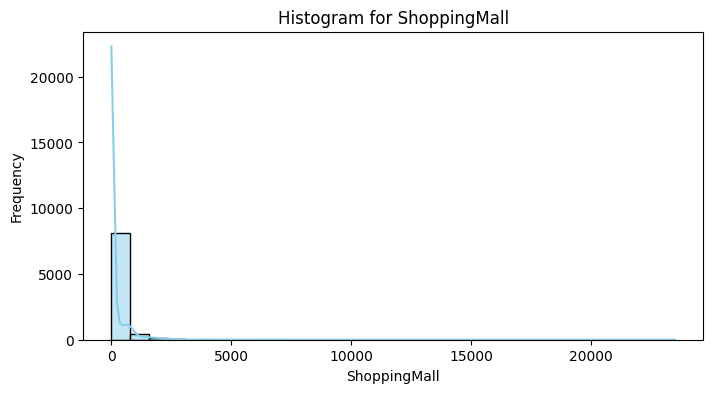

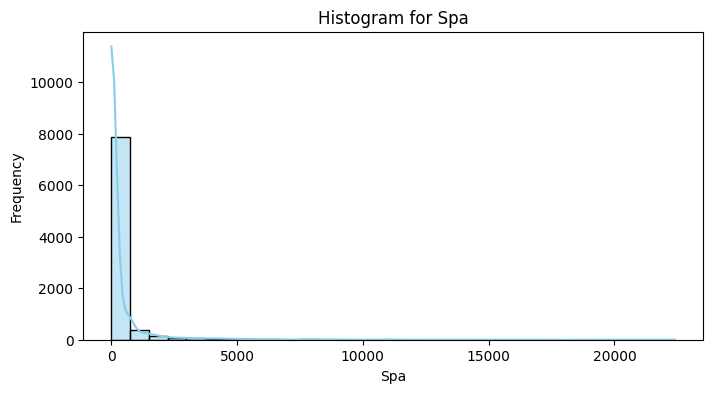

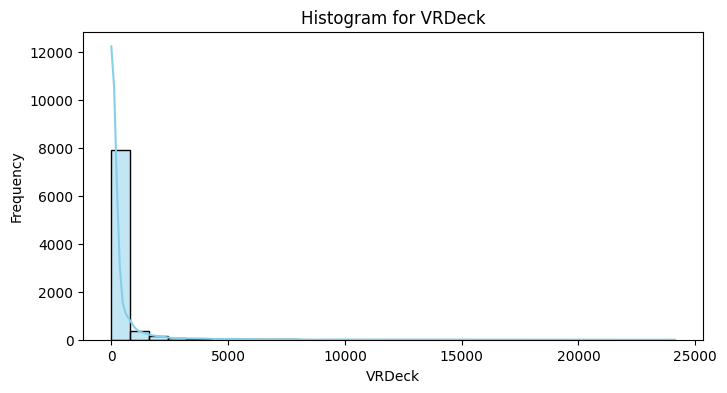

In [ ]:
# Plot histograms with KDE for numerical columns
numerical_columns = train_imputed_df.select_dtypes(include=['int', 'float']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_imputed_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


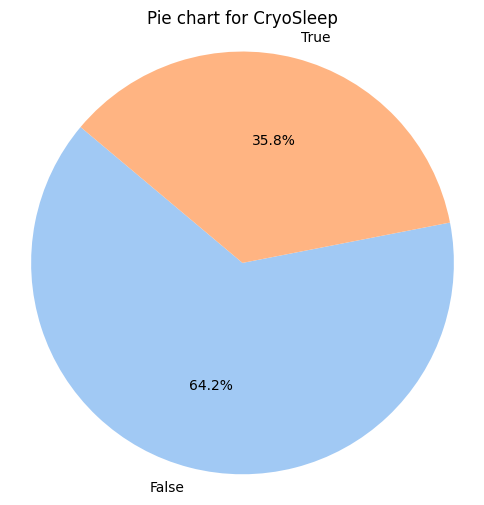

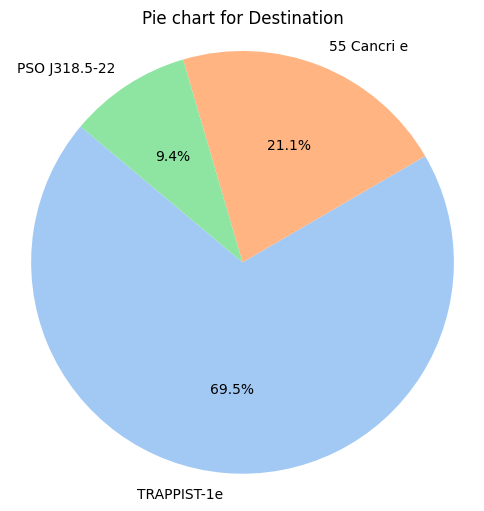

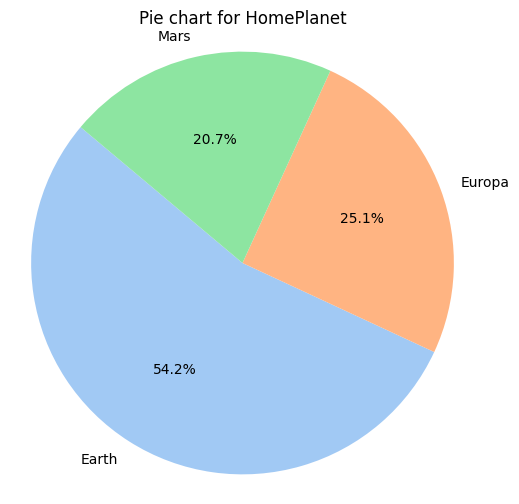

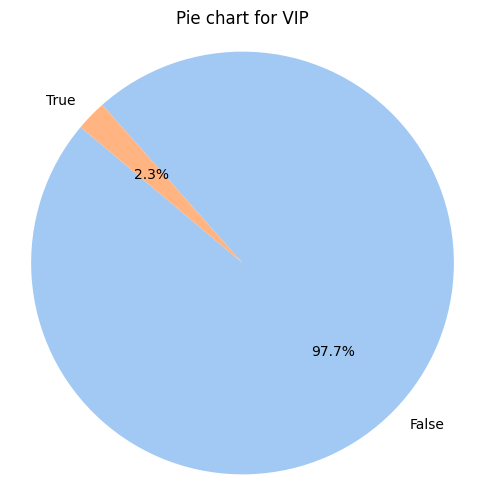

In [ ]:
# Plot pie charts for categorical columns
categorical_columns = train_imputed_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    train_imputed_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    plt.title(f'Pie chart for {col}')
    plt.ylabel('')
    plt.axis('equal')
    plt.show()

In [ ]:
train_imputed_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Destination,HomePlanet,Transported,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,False,TRAPPIST-1e,Europa,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,TRAPPIST-1e,Earth,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,TRAPPIST-1e,Europa,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,TRAPPIST-1e,Europa,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,TRAPPIST-1e,Earth,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,55 Cancri e,Europa,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,True,PSO J318.5-22,Earth,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,TRAPPIST-1e,Earth,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,55 Cancri e,Europa,False,False


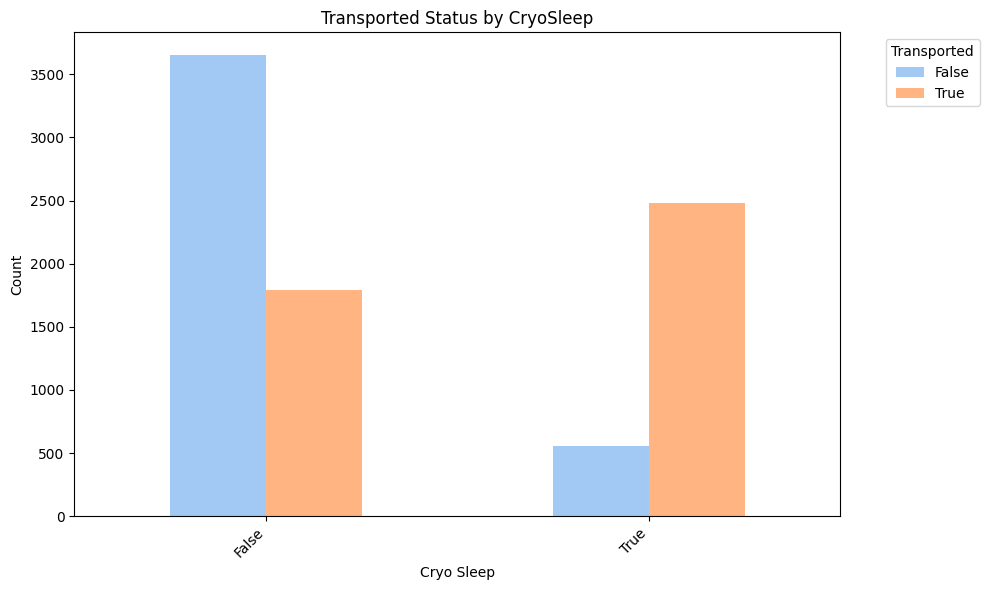

In [ ]:
grouped = train_imputed_df.groupby(['CryoSleep', 'Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  color=sns.color_palette('pastel'), figsize=(10, 6))
plt.title('Transported Status by CryoSleep')
plt.xlabel('Cryo Sleep')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

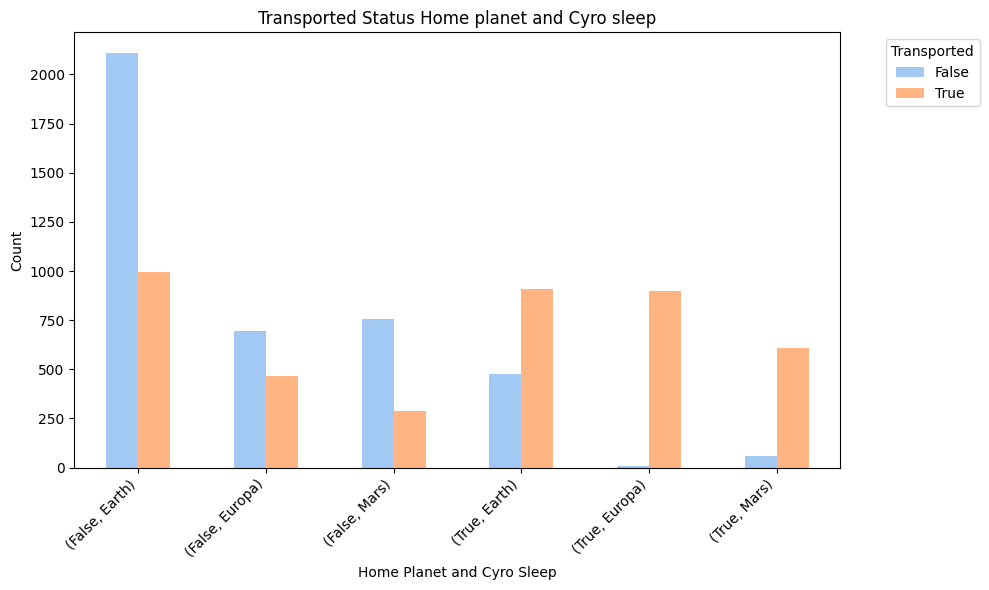

In [ ]:
grouped = train_imputed_df.groupby(['CryoSleep', 'HomePlanet','Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  color=sns.color_palette('pastel'), figsize=(10, 6))
plt.title('Transported Status Home planet and Cyro sleep')
plt.xlabel('Home Planet and Cyro Sleep')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

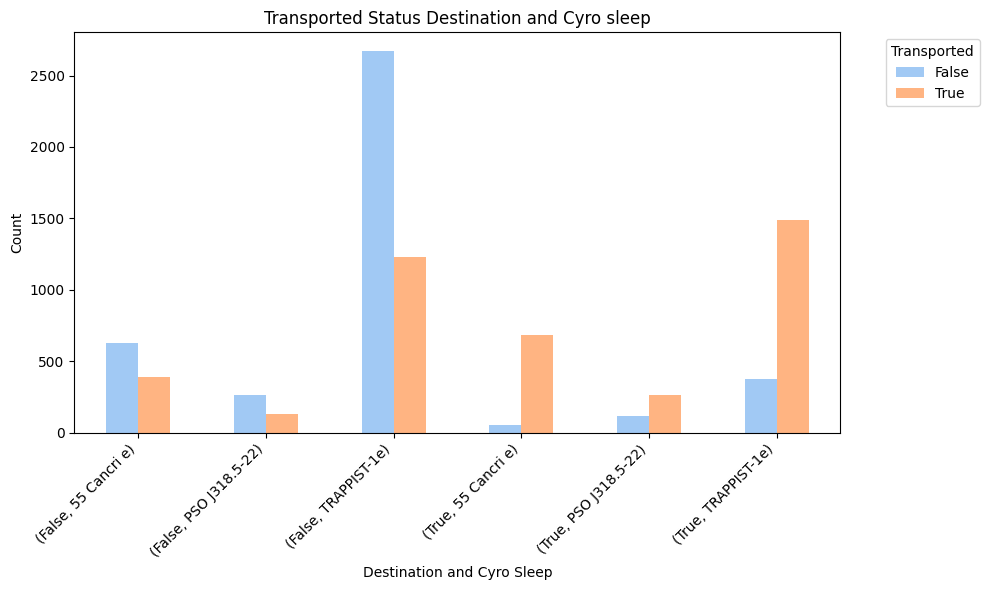

In [ ]:
grouped = train_imputed_df.groupby(['CryoSleep', 'Destination','Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  color=sns.color_palette('pastel'), figsize=(10, 6))
plt.title('Transported Status Destination and Cyro sleep')
plt.xlabel('Destination and Cyro Sleep')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
train_imputed_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Destination,HomePlanet,Transported,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,False,TRAPPIST-1e,Europa,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,TRAPPIST-1e,Earth,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,TRAPPIST-1e,Europa,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,TRAPPIST-1e,Europa,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,TRAPPIST-1e,Earth,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,55 Cancri e,Europa,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,True,PSO J318.5-22,Earth,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,TRAPPIST-1e,Earth,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,55 Cancri e,Europa,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_encoder = LabelEncoder()
train_imputed_df['Transported']= lb_encoder.fit_transform(train_imputed_df['Transported'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# select features to encode
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

encoder = OrdinalEncoder()
train_imputed_df[features] = encoder.fit_transform(train_imputed_df[features])
test_imputed_df[features]= encoder.transform(test_imputed_df[features])

In [ ]:
train_imputed_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Destination,HomePlanet,Transported,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,2.0,0.0,1,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,2.0,1.0,0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2.0,1.0,0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,0.0,2.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,0.0,1.0,0,1.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0.0,2.0,0.0,1,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0.0,0.0,1.0,0,0.0


In [23]:
X= train_imputed_df.drop(['Transported'], axis= 1)
y= train_imputed_df.Transported.astype(int)

from sklearn.model_selection import train_test_split
# spliting of data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                train_size=0.8, random_state=42)

In [24]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Create Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names
# Assuming you have feature names stored in a list named 'feature_names'
feature_names = X.columns # Replace with your actual feature names

# Get feature importance for each base classifier
for name, estimator in stacking_classifier.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        # For classifiers with feature_importances_ attribute (e.g., RandomForest, GradientBoosting)
        feature_importance = estimator.feature_importances_
    elif hasattr(estimator, 'coef_'):
        # For classifiers with coef_ attribute (e.g., LogisticRegression)
        feature_importance = abs(estimator.coef_[0])
    else:
        # For classifiers without feature importance information
        feature_importance = None

    if feature_importance is not None:
        # Plot feature importance with feature names
        plt.figure(figsize=(10, 6))
        plt.bar(feature_names, feature_importance)
        plt.title(f'Feature Importance for {name}')
        plt.xlabel('Feature Names')
        plt.ylabel('Feature Importance')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
        plt.show()

AttributeError: 'StackingClassifier' object has no attribute 'named_estimators_'

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the accuracy score
accuracy = accuracy_score(y_test, y_pred)  # Renamed variable to avoid conflict

print(f"Classification Report:\n{report}\n")
print(f"Confusion Matrix:\n{matrix}\n")
print(f"Accuracy Score: {accuracy}\n")


AttributeError: 'StackingClassifier' object has no attribute 'estimators_'

In [27]:
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 20})
plt.xlabel('Predicted', size=15)
plt.ylabel('Actual', size=15)
plt.title('Confusion Matrix', size=18)
plt.show()

NameError: name 'matrix' is not defined

In [ ]:
new_test = test_imputed_df.drop(['Cabin','Name','PassengerId'],axis=1)
test_predictions = stacking_classifier.predict(new_test)
output = pd.DataFrame({'PassengerId': test_imputed_df['PassengerId'].values, 'Transported': test_predictions})
output['Transported'] = output['Transported'].map({0: 'False', 1: 'True'})
output.to_csv('submission.csv', index=False)